<a href="https://colab.research.google.com/github/AhmedMoneimm/SortingTechniques/blob/main/DS2_SortingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sorting Techniques**
Data Structure 2- Assignment 1

Made by:

#**`mon3im clutchat - solom - hazem shablanga`**

note: the order of names maktooba kda 3shan 3amla balance

#Outline
###Part1
- [1- Quick Sort](#part1_1)
- [2- Merge Sort](#part1_2)
- [3- Heap Sort](#part1_3)
- [4- Selection Sort](#part1_4)
- [5- Insertion Sort](#part1_5)
- [6- Time comparison Report](#part1_6)

###Part2
- [1- Hybrid Merge and Selection Algorithm](#part2_1)
- [2- K<sup>th</sup> Smallest Element](#part2_2)





##0 - Import some libraries and declare some variables

In [1]:
import time
import random
import matplotlib.pyplot as plt
import copy


sizes = [1000, 25000, 50000, 75000, 100000]

def generate_single_random_array(size, max):
    array = []
    for i in range(0, size):
        array.append(random.randint(0, max))
    return array

class ArraySizes:
    arr = []
    def __init__(self, sizes):
      if not ArraySizes.arr:
        for size in sizes:
          ArraySizes.arr.append(generate_single_random_array(size, 1000))


array_of_arrays=ArraySizes(sizes).arr

<a name="part1_1"></a>
## 1 - Quick Sort
Intro yetkatab hena + shar7
- shar7 bullet points
- shar7 bullet points bardo

###1.1 Quick Sort's implementation

In [2]:
# def QuickSort(arr):
#   #implementation


In [3]:
def QuickSort(array, start, end):
  if len(array) == 1: #base case
      return array
  if start < end:
      q = randomized_partition(array, start, end) #get randomized pivot and partition around it
      QuickSort(array, start, q-1) #recurse on part of array smaller than pivot
      QuickSort(array, q+1, end) #recurse on part of array greater than pivot

def randomized_partition(array, start, end):            
    i = random.randint(start, end) #choose random element and swap it with end
    array[end], array[i] = array[i], array[end]
    return partition(array, start, end) #call partition on modified array

def partition(array, start, end):
    i = start-1
    x = array[end] #choose end element as pivot
    for j in range(start, end): #loop on elements
        if array[j] <= x:
            i = i+1 #indicates right position of pivot so far and number of elements smaller than pivot
            array[j], array[i] = array[i], array[j] #swap current element with element smaller than pivot
    array[i+1], array[end] = array[end], array[i+1] #put pivot in its correct place
    return i+1

###1.2 Quick Sort's Running Time Performance

In [4]:
QuickSort_times = []
multiple_arrays_qs=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_qs:
    n=len(arr)

    start_time = time.time()

    QuickSort(arr, 0, n - 1)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    QuickSort_times.append(elapsed_time_ms)

    print(f"Running time for Quick Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Quick Sort for array size of 1000 is 2.09 ms
Running time for Quick Sort for array size of 25000 is 115.19 ms
Running time for Quick Sort for array size of 50000 is 348.45 ms
Running time for Quick Sort for array size of 75000 is 766.36 ms
Running time for Quick Sort for array size of 100000 is 1094.66 ms


###1.3 Quick Sort Graph - Time (milliseconds) vs Array Size

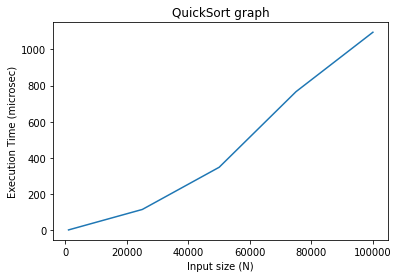

In [5]:
plt.plot(sizes, QuickSort_times) # to add label, put this in the parameters ", label="QuickSort""
plt.title("QuickSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

# plt.legend()---used to label lines (must pass a label in the plot function)
plt.show()

<a name="part1_2"></a>
## 2 - Merge Sort
Intro yetkatab hena + shar7
- shar7 bullet points
- shar7 bullet points bardo

###2.1 Merge Sort's implementation

In [6]:
# def MergeSort(array, start, end):
#   print("implementation")

In [18]:
def MergeSort(array, start, end):
    if start < end:
        mid = start + (end - start) // 2  #same as (start + end)//2 but to prevent overflow
        MergeSort(array, start, mid) #recurse on left part of array
        MergeSort(array, mid + 1, end) #recurse on right part of array
        merge(array, start, mid, end) #combining step

def merge(array, start, mid, end):
    size1 = mid - start + 1
    size2 = end - mid
    L = [0] * (size1) #initialize L array with zeros
    R = [0] * (size2) #initialize R array with zeros

    for i in range(0, size1): #copy left part of main array to L
        L[i] = array[start+i]
    for i in range(0, end-mid): #copy right part of main array to R
        R[i] = array[mid+i+1]
    i = 0
    j = 0
    k = start
    #merge both arrays: put elements in order in main array
    while i < size1 and j < size2:
        if L[i] <= R[j]:
            array[k] = L[i]
            i = i+1
        else:
            array[k] = R[j]
            j = j+1
        k = k+1

    #if one array is bigger than the other
    while i < size1:
        array[k] = L[i]
        i = i+1
        k = k+1

    while j < size2:
        array[k] = R[j]
        j = j+1
        k = k+1

###2.2 Merge Sort's Running Time Performance

In [16]:
MergeSort_times = []
multiple_arrays_ms=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_ms:
    n=len(arr)

    start_time = time.time()

    MergeSort(arr, 0, n-1)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    MergeSort_times.append(elapsed_time_ms)

    print(f"Running time for Merge Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Merge Sort for array size of 1000 is 3.21 ms
Running time for Merge Sort for array size of 25000 is 110.08 ms
Running time for Merge Sort for array size of 50000 is 250.98 ms
Running time for Merge Sort for array size of 75000 is 403.73 ms
Running time for Merge Sort for array size of 100000 is 542.92 ms


###2.3 Merge Sort Graph - Time (milliseconds) vs Array Size

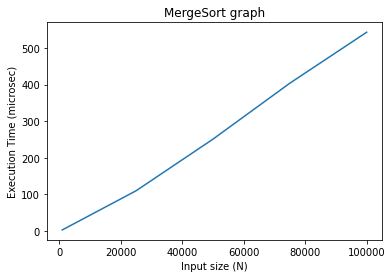

In [17]:
plt.plot(sizes, MergeSort_times) # to add label, put this in the parameters ", label="MergeSort""
plt.title("MergeSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

# plt.legend()---used to label lines (must pass a label in the plot function)
plt.show()

<a name="part1_3"></a>
## 3 - Heap Sort
Intro yetkatab hena + shar7
- shar7 bullet points
- shar7 bullet points bardo

###3.1 Heap Sort's implementation

In [10]:
#mn3m

def heapify(arr, N, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
 
    # See if left child of root exists and is
    # greater than root
    if l < N and arr[largest] < arr[l]:
        largest = l
 
    # See if right child of root exists and is
    # greater than root
    if r < N and arr[largest] < arr[r]:
        largest = r
 
    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
        # Heapify the root.
        heapify(arr, N, largest)
 
# The main function to sort an array of given size
 
 
def HeapSort(arr):
    N = len(arr)
 
    # Build a maxheap.
    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)
 
    # One by one extract elements
    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

###3.2 Heap Sort's Running Time Performance

In [13]:
HeapSort_times = []
multiple_arrays_hs=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_hs:
    n=len(arr)

    start_time = time.time()

    HeapSort(arr)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    HeapSort_times.append(elapsed_time_ms)

    print(f"Running time for Merge Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Merge Sort for array size of 1000 is 3.71 ms
Running time for Merge Sort for array size of 25000 is 140.61 ms
Running time for Merge Sort for array size of 50000 is 328.18 ms
Running time for Merge Sort for array size of 75000 is 571.77 ms
Running time for Merge Sort for array size of 100000 is 756.46 ms


###3.3 Heap Sort Graph - Time (milliseconds) vs Array Size

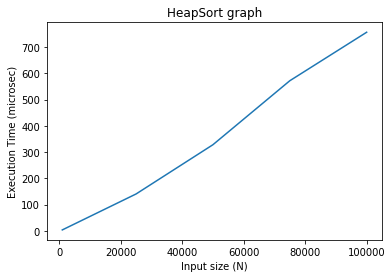

In [14]:
plt.plot(sizes, HeapSort_times) # to add label, put this in the parameters ", label="HeapSort""
plt.title("HeapSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

# plt.legend()---used to label lines (must pass a label in the plot function)
plt.show()